### Import avian bird flu data

In [71]:
import pandas as pd

bird_flu = pd.read_csv('bird flu.csv')
bird_flu.head()
bird_flu['Outbreak Date'] = pd.to_datetime(bird_flu['Outbreak Date'])

bird_flu = bird_flu.groupby(bird_flu["Outbreak Date"].dt.to_period("M"))["Outbreaks"].sum().reset_index()
bird_flu["Outbreak Date"] = bird_flu["Outbreak Date"].astype(str)

bird_flu.head()

,Outbreak Date,Outbreaks
0,2022-02,8
1,2022-03,56
2,2022-04,68
3,2022-05,56
4,2022-06,14


### Initialize dataframe and add avian bird flu data

In [72]:
df = pd.DataFrame()
df['Year-Month'] = bird_flu['Outbreak Date']
df['Outbreaks'] = bird_flu['Outbreaks']

# Rename Outbreaks to Avian Outbreaks
df.rename(columns={'Outbreaks': 'Avian Outbreaks'}, inplace=True)

print(df.head())

  Year-Month  Avian Outbreaks
0    2022-02                8
1    2022-03               56
2    2022-04               68
3    2022-05               56
4    2022-06               14


### Import and initialize y, add to the dataframe

In [73]:
prices = pd.read_excel("grade a egg prices.xlsx", sheet_name="Monthly")

# Display the first few rows of the DataFrame
prices.head()

# Convert the observation_date column to datetime format
prices['observation_date'] = pd.to_datetime(prices['observation_date'])

# Convert observation_date to Year-Month format
prices['observation_date'] = prices['observation_date'].dt.to_period('M').astype(str)

# Rename column
prices.rename(columns={"observation_date": "Year-Month", "APU0000708111":"Price"}, inplace=True)
prices.head()

# Merge df and prices on Year-Month
df = pd.merge(df, prices, on='Year-Month', how='left')
df

,Year-Month,Avian Outbreaks,Price
0,2022-02,8,2.005
1,2022-03,56,2.046
2,2022-04,68,2.520
3,2022-05,56,2.863
4,2022-06,14,2.707
5,2022-07,3,2.936
6,2022-08,8,3.116
7,2022-09,108,2.902
8,2022-10,66,3.419
9,2022-11,98,3.589


### Bacon prices

In [74]:
bacon_prices = pd.read_excel("bacon prices.xlsx", sheet_name="Monthly")

# Rename the second column to "bacon price"
bacon_prices = bacon_prices.rename(columns={bacon_prices.columns[1]: "bacon price"})
bacon_prices.head()

# Convert the observation date to datetime format
bacon_prices["observation_date"] = pd.to_datetime(bacon_prices["observation_date"])

# Group by year and month, and calculate the mean bacon price
bacon_prices["year_month"] = bacon_prices["observation_date"].dt.to_period("M")
bacon_prices_grouped = bacon_prices.groupby("year_month")["bacon price"].mean().reset_index()
bacon_prices_grouped.head()

,year_month,bacon price
0,1980-01,1.453
1,1980-02,1.410
2,1980-03,1.361
3,1980-04,1.323
4,1980-05,1.266


In [75]:
# Convert 'Year-Month' in df to period[M] type
df['Year-Month'] = pd.to_datetime(df['Year-Month']).dt.to_period('M')

# Merge df and bacon_prices_grouped on Year-Month
df = pd.merge(df, bacon_prices_grouped, left_on="Year-Month", right_on="year_month", how="left")
df = df.drop(columns=["year_month"])
df

,Year-Month,Avian Outbreaks,Price,bacon price
0,2022-02,8,2.005,7.097
1,2022-03,56,2.046,7.203
2,2022-04,68,2.520,7.422
3,2022-05,56,2.863,7.364
4,2022-06,14,2.707,7.403
5,2022-07,3,2.936,7.415
6,2022-08,8,3.116,7.372
7,2022-09,108,2.902,7.383
8,2022-10,66,3.419,7.608
9,2022-11,98,3.589,7.243


### Commerical Backyard Flocks

In [76]:
# commercial_backyard_flocks = pd.read_csv("commercial-backyard-flocks.csv")
# commercial_backyard_flocks.head()

# # Convert the date column to datetime format
# commercial_backyard_flocks['date'] = pd.to_datetime(commercial_backyard_flocks['Outbreak Date'])

# # Group by year and month, and calculate the mean number of commercial backyard flocks
# commercial_backyard_flocks['year_month'] = commercial_backyard_flocks['date'].dt.to_period('M')
# commercial_backyard_flocks_grouped = commercial_backyard_flocks.groupby('year_month')['Flock Size'].sum().reset_index()
# commercial_backyard_flocks_grouped.head()

In [77]:
# # Concat df and commercial_backyard_flocks_grouped on Year-Month
# df = pd.merge(df, commercial_backyard_flocks_grouped, left_on="Year-Month", right_on="year_month", how="left")
# # Drop year_month column from df
# df = df.drop(columns=["year_month"])
# df.head()

### Cage free - no data after 2021, drop from the model

In [78]:
# cage_free = pd.read_csv('cage-free-percentages.csv')
# cage_free.dropna()
# cage_free['observed_month'] = pd.to_datetime(cage_free['observed_month'])
# cage_free = cage_free.groupby(cage_free['observed_month'].dt.to_period('M'))['percent_eggs'].sum().reset_index()

# cage_free = cage_free[cage_free['percent_eggs'] != 0]
# cage_free

In [79]:
# # Concat X and cage_free on observed_month and Year-Month
# X = pd.concat([X, cage_free], axis=1)
# # Drop observed_month column from X
# X = X.drop(columns=["observed_month"])
# X.head()

### Egg production (number of hens) - also no data after 2021, drop from the model

In [80]:
# # Import egg production data
# egg_production = pd.read_csv("egg-production.csv")
# egg_production.head()

# # Convert the date column to datetime format
# egg_production['observed_month'] = pd.to_datetime(egg_production['observed_month'])

# # Group by year and month, and calculate the mean number of eggs produced
# egg_production['year_month'] = egg_production['observed_month'].dt.to_period('M')
# egg_production.head()
# egg_production_grouped = egg_production.groupby('year_month')['n_hens'].sum().reset_index()
# egg_production_grouped

### Milk Prices - also no data after 1986, drop from the model

In [81]:
# # Import milk prices data
# milk_prices = pd.read_excel("milk prices.xlsx", sheet_name="Monthly")
# milk_prices.head()

# # Rename the second column to "milk price"
# milk_prices = milk_prices.rename(columns={milk_prices.columns[1]: "milk price"})
# milk_prices.head()

# # Convert the date column to datetime format
# milk_prices['observation_date'] = pd.to_datetime(milk_prices['observation_date'])

# # Group by year and month, and calculate the mean milk price
# milk_prices['year_month'] = milk_prices['observation_date'].dt.to_period('M')
# milk_prices_grouped = milk_prices.groupby('year_month')['milk price'].mean().reset_index()
# milk_prices_grouped

### Potato Prices

In [82]:
# Import potato prices data
potato_prices = pd.read_excel("potato prices.xlsx", sheet_name="Monthly")
potato_prices.head()

# Rename the second column to "potato price"
potato_prices = potato_prices.rename(columns={potato_prices.columns[1]: "potato price"})
potato_prices.head()

# Convert the date column to datetime format
potato_prices['observation_date'] = pd.to_datetime(potato_prices['observation_date'])

# Group by year and month, and calculate the mean potato price
potato_prices['year_month'] = potato_prices['observation_date'].dt.to_period('M')
potato_prices_grouped = potato_prices.groupby('year_month')['potato price'].mean().reset_index()
potato_prices_grouped.head()

,year_month,potato price
0,1986-03,0.207
1,1986-04,0.215
2,1986-05,0.225
3,1986-06,0.256
4,1986-07,0.288


In [83]:
# Merge df with potato_prices_grouped on Year-Month
df = pd.merge(df, potato_prices_grouped, left_on="Year-Month", right_on="year_month", how="left")
# Drop year_month column from df
df = df.drop(columns=["year_month"])
df.head()

,Year-Month,Avian Outbreaks,Price,bacon price,potato price
0,2022-02,8,2.005,7.097,0.802
1,2022-03,56,2.046,7.203,0.825
2,2022-04,68,2.520,7.422,0.849
3,2022-05,56,2.863,7.364,0.875
4,2022-06,14,2.707,7.403,0.891


### Soybean prices

In [84]:
# Import the soybean prices csv but only rows 16 to 14237, where row 16 is header
soybean_prices = pd.read_csv('soybean-prices-historical-chart-data.csv', skiprows=15, nrows=14222)
soybean_prices.head()

# Rename the second column to "soybean price"
soybean_prices = soybean_prices.rename(columns={soybean_prices.columns[1]: "soybean price"})
soybean_prices.head()

,date,soybean price
0,1968-12-05,2.4375
1,1968-12-06,2.4475
2,1968-12-09,2.4363
3,1968-12-10,2.4375
4,1968-12-11,2.4463


In [85]:
# Rename the column to remove leading/trailing spaces
soybean_prices.rename(columns=lambda x: x.strip(), inplace=True)

# Convert the date column to datetime format
soybean_prices['date'] = pd.to_datetime(soybean_prices['date'])
soybean_prices['year-month'] = soybean_prices['date'].dt.to_period('M')
# Group by year and month, and calculate the mean soybean price
soybean_prices_grouped = soybean_prices.groupby('year-month')['soybean price'].mean().reset_index()
soybean_prices_grouped.head()

,year-month,soybean price
0,1968-12,2.453978
1,1969-01,2.462059
2,1969-02,2.441995
3,1969-03,2.394335
4,1969-04,2.392690


In [86]:
# Merge df and soybean_prices_grouped on Year-Month
df = pd.merge(df, soybean_prices_grouped, left_on="Year-Month", right_on="year-month", how="left")
# Drop Year-Month column from df
df = df.drop(columns=["year-month"])
df.head()

,Year-Month,Avian Outbreaks,Price,bacon price,potato price,soybean price
0,2022-02,8,2.005,7.097,0.802,15.885375
1,2022-03,56,2.046,7.203,0.825,16.733152
2,2022-04,68,2.520,7.422,0.849,16.798190
3,2022-05,56,2.863,7.364,0.875,16.583690
4,2022-06,14,2.707,7.403,0.891,16.876064


### Wheat Prices

In [87]:
# Import wheat prices excel file
wheat_prices = pd.read_excel("wheat prices.xlsx", sheet_name="Data")
wheat_prices.head()

# Rename the second column to "wheat price"
wheat_prices = wheat_prices.rename(columns={wheat_prices.columns[1]: "wheat price"})
wheat_prices.head()

# Date is currently in form Jan-2023, so convert to datetime format
wheat_prices['Date'] = pd.to_datetime(wheat_prices['Date'], format='%b-%Y')

# Convert Date to Year-Month format
wheat_prices['year-month'] = wheat_prices['Date'].dt.to_period('M')

# Drop Date column from wheat_prices
wheat_prices = wheat_prices.drop(columns=["Date"])

# Reset index of wheat_prices
wheat_prices.reset_index(drop=True, inplace=True)

wheat_prices

,wheat price,year-month
0,59.89,1960-01
1,60.99,1960-02
2,61.73,1960-03
3,60.99,1960-04
4,57.69,1960-05
...,...,...
776,269.69,2024-09
777,272.85,2024-10
778,253.75,2024-11
779,252.17,2024-12


In [88]:
# Merge df and wheat prices on Year-Month
df = pd.merge(df, wheat_prices, left_on="Year-Month", right_on="year-month", how="left")
# Drop Year-Month column from df
df = df.drop(columns=["year-month"])
df

,Year-Month,Avian Outbreaks,Price,bacon price,potato price,soybean price,wheat price
0,2022-02,8,2.005,7.097,0.802,15.885375,390.50
1,2022-03,56,2.046,7.203,0.825,16.733152,486.30
2,2022-04,68,2.520,7.422,0.849,16.798190,495.28
3,2022-05,56,2.863,7.364,0.875,16.583690,522.29
4,2022-06,14,2.707,7.403,0.891,16.876064,459.59
5,2022-07,3,2.936,7.415,0.945,15.627895,382.50
6,2022-08,8,3.116,7.372,0.994,15.713043,382.86
7,2022-09,108,2.902,7.383,1.019,14.637727,419.14
8,2022-10,66,3.419,7.608,0.991,13.812381,437.95
9,2022-11,98,3.589,7.243,0.945,14.417273,422.68


In [89]:
# Encode Year-Month as an integer "months since start"
i = 0
# Calculate months_since_start based on the Year-Month column
df['months_since_start'] = (df['Year-Month'] - df['Year-Month'].min()).apply(lambda x: x.n)

# Drop Year-Month column from df
df = df.drop(columns=["Year-Month"])
df


,Avian Outbreaks,Price,bacon price,potato price,soybean price,wheat price,months_since_start
0,8,2.005,7.097,0.802,15.885375,390.50,0
1,56,2.046,7.203,0.825,16.733152,486.30,1
2,68,2.520,7.422,0.849,16.798190,495.28,2
3,56,2.863,7.364,0.875,16.583690,522.29,3
4,14,2.707,7.403,0.891,16.876064,459.59,4
5,3,2.936,7.415,0.945,15.627895,382.50,5
6,8,3.116,7.372,0.994,15.713043,382.86,6
7,108,2.902,7.383,1.019,14.637727,419.14,7
8,66,3.419,7.608,0.991,13.812381,437.95,8
9,98,3.589,7.243,0.945,14.417273,422.68,9


### Training the model

In [90]:
# Train and linear regression and random forest model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Drop rows with NaN values
df = df.dropna()
# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)


# Split the data into features and target variable
X = df.drop(columns=["Price"])
y = df["Price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the models
y_lr = lr_model.predict(X_test)
y_rf = rf_model.predict(X_test)

# Calculate RMSE and R^2 for Linear Regression
lr_rmse = mean_squared_error(y_test, y_lr)
lr_r2 = r2_score(y_test, y_lr)

# Calculate RMSE and R^2 for Random Forest Regressor
rf_rmse = mean_squared_error(y_test, y_rf)
rf_r2 = r2_score(y_test, y_rf)

# Print the evaluation metrics
print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression R^2:", lr_r2)
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R^2:", rf_r2)

Linear Regression RMSE: 0.455375344661986
Linear Regression R^2: 0.12332485072710486
Random Forest RMSE: 0.3398564422571437
Random Forest R^2: 0.3457184260419437


### Perform cross validation for feature selection

Cross-Validation RMSE Scores: [1.74753797 0.9371717  0.95410942 0.39645154 1.25668454]
Mean Cross-Validation RMSE: 1.0583910334918274


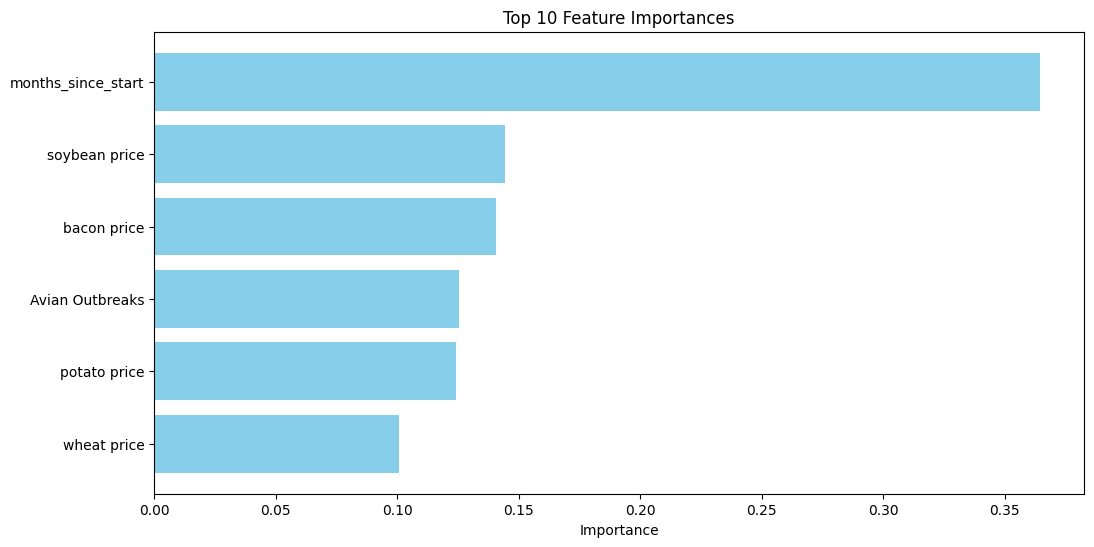

In [91]:
# Perform cross validation for feature selection
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline with scaling and feature selection
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(RandomForestRegressor(random_state=42))),
    ('model', RandomForestRegressor(random_state=42))
])
# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
# Convert negative MSE to RMSE
rmse_scores = (-cv_scores) ** 0.5
# Print the RMSE scores for each fold
print("Cross-Validation RMSE Scores:", rmse_scores)
# Print the mean RMSE score
print("Mean Cross-Validation RMSE:", rmse_scores.mean())
# Feature importance from Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)
importances = rf_model.feature_importances_
feature_names = X.columns
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df.head(10)
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(importances_df['Feature'][:10], importances_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [94]:
# Export X and y to CSV files
X.to_csv('X.csv', index=False)
y.to_csv('y.csv', index=False)

In [95]:
# Export df to CSV file
df.to_csv('df.csv', index=False)

### Retrain the model with only the top 3 most correlated features

In [92]:
# Retrain the model with only the top 3 most important features: months_since_start, soybean price, and bacon price
X_top3 = df[['months_since_start', 'soybean price', 'bacon price']]
y_top3 = df['Price']
# Split the data into training and testing sets
X_train_top3, X_test_top3, y_train_top3, y_test_top3 = train_test_split(X_top3, y_top3, test_size=0.2, random_state=42)
# Train a Linear Regression model
lr_model_top3 = LinearRegression()
lr_model_top3.fit(X_train_top3, y_train_top3)
# Train a Random Forest Regressor
rf_model_top3 = RandomForestRegressor(random_state=42)
rf_model_top3.fit(X_train_top3, y_train_top3)
# Evaluate the models
y_lr_top3 = lr_model_top3.predict(X_test_top3)
y_rf_top3 = rf_model_top3.predict(X_test_top3)
# Calculate RMSE and R^2 for Linear Regression
lr_rmse_top3 = mean_squared_error(y_test_top3, y_lr_top3)
lr_r2_top3 = r2_score(y_test_top3, y_lr_top3)
# Calculate RMSE and R^2 for Random Forest Regressor
rf_rmse_top3 = mean_squared_error(y_test_top3, y_rf_top3)
rf_r2_top3 = r2_score(y_test_top3, y_rf_top3)
# Print the evaluation metrics for top 3 features
print("Top 3 Features - Linear Regression RMSE:", lr_rmse_top3)
print("Top 3 Features - Linear Regression R^2:", lr_r2_top3)
print("Top 3 Features - Random Forest RMSE:", rf_rmse_top3)
print("Top 3 Features - Random Forest R^2:", rf_r2_top3)

Top 3 Features - Linear Regression RMSE: 0.746039054310811
Top 3 Features - Linear Regression R^2: -0.43625232891520116
Top 3 Features - Random Forest RMSE: 0.26538785504285795
Top 3 Features - Random Forest R^2: 0.48908314830349886


In [93]:
# Top 4 features
X_top4 = df[['months_since_start', 'soybean price', 'bacon price', 'potato price']]
y_top4 = df['Price']
# Split the data into training and testing sets
X_train_top4, X_test_top4, y_train_top4, y_test_top4 = train_test_split(X_top4, y_top4, test_size=0.2, random_state=42)
# Train a Linear Regression model
lr_model_top4 = LinearRegression()
lr_model_top4.fit(X_train_top4, y_train_top4)
# Train a Random Forest Regressor
rf_model_top4 = RandomForestRegressor(random_state=42)
rf_model_top4.fit(X_train_top4, y_train_top4)
# Evaluate the models
y_lr_top4 = lr_model_top4.predict(X_test_top4)
y_rf_top4 = rf_model_top4.predict(X_test_top4)
# Calculate RMSE and R^2 for Linear Regression
lr_rmse_top4 = mean_squared_error(y_test_top4, y_lr_top4)
lr_r2_top4 = r2_score(y_test_top4, y_lr_top4)
# Calculate RMSE and R^2 for Random Forest Regressor
rf_rmse_top4 = mean_squared_error(y_test_top4, y_rf_top4)
rf_r2_top4 = r2_score(y_test_top4, y_rf_top4)
# Print the evaluation metrics for top 4 features
print("Top 4 Features - Linear Regression RMSE:", lr_rmse_top4)
print("Top 4 Features - Linear Regression R^2:", lr_r2_top4)
print("Top 4 Features - Random Forest RMSE:", rf_rmse_top4)
print("Top 4 Features - Random Forest R^2:", rf_r2_top4)

Top 4 Features - Linear Regression RMSE: 0.7551900073431044
Top 4 Features - Linear Regression R^2: -0.4538694731229753
Top 4 Features - Random Forest RMSE: 0.28439865584285756
Top 4 Features - Random Forest R^2: 0.4524841167035164
